In [1]:
from sequenzo import *
import pandas as pd

## 

In [2]:
# ------------------------
# Step 0: 定义提取工具函数
# ------------------------

def extract_state_space(sequences):
    return sorted(set(s for seq in sequences for s in seq))

# ------------------------
# Step 1: 读取和准备数据
# ------------------------

df = pd.read_csv("/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/test_data/real_data_my_paper/detailed_sequence_10_work_years_df.csv")

time_cols = [f"C{i}" for i in range(1, 11)]  # C1~C10

# 假设 'country' 是一列，值为 'India' 或 'US'
india_df = df[df["country"] == "india"].copy()
us_df = df[df["country"] == "us"].copy()

T = len(time_cols)  # 一般是固定 10

# 提取 sequence 列
india_sequences = extract_sequences(india_df, time_cols)
us_sequences = extract_sequences(us_df, time_cols)

india_states = extract_state_space(india_sequences)
us_states = extract_state_space(us_sequences)

# ------------------------
# Step 2: 构建前缀树
# ------------------------

india_tree = build_prefix_tree(india_sequences)
us_tree = build_prefix_tree(us_sequences)

# 为每个国家分别建模
india_model = IndividualDivergence(india_sequences)
us_model = IndividualDivergence(us_sequences)

In [3]:
print('india_tree:', india_tree)
print('us_tree:', us_tree)

india_tree: PrefixTree(max_depth=10, total_prefixes=5804)
us_tree: PrefixTree(max_depth=10, total_prefixes=5517)


In [4]:
df

,worker_id,gender,country,cohort,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
2,josh-slosson-07a1509,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38897,nan-jiang-743a9863,female,us,0-10 total work years,software,software,software,software,software,software,software,software,software,software
38898,tina-pava-4846207,female,us,21-30 total work years,software,software,software,software,software,software,software,software,software,software
38899,sariandoni,female,us,21-30 total work years,support & test,software,software,software,software,software,software,research,research,research
38900,nancy-jain-a8723460,female,us,0-10 total work years,software,software,software,software,software,support & test,software,software,software,software


In [5]:
india_prefix_counts = compute_prefix_count(india_tree, T)
india_branching_factors = compute_branching_factor(india_tree, T)
india_js_scores = compute_js_divergence(india_sequences, state_set=india_states)

us_prefix_counts = compute_prefix_count(us_tree, T)
us_branching_factors = compute_branching_factor(us_tree, T)
us_js_scores = compute_js_divergence(us_sequences, state_set=us_states)

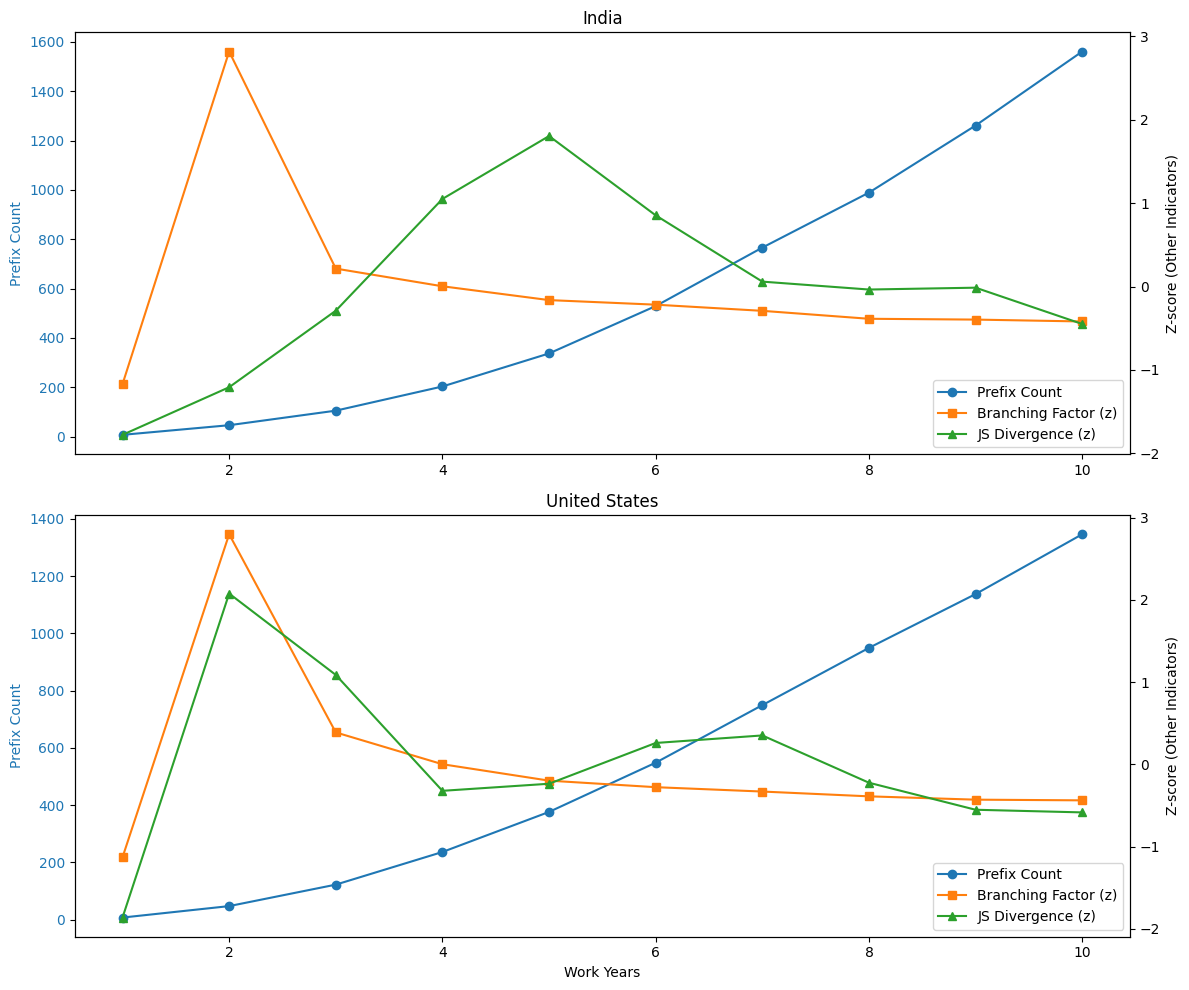

✅ 已生成带有自定义标题的对比图


<Figure size 640x480 with 0 Axes>

In [6]:
# 演示自定义子图标题功能
# 使用完全自定义的标题

# 准备两组数据
custom_groups_data = {
    "IND": {
        "prefix_counts": india_prefix_counts,
        "branching_factors": india_branching_factors,
        "js_scores": india_js_scores
    },
    "USA": {
        "prefix_counts": us_prefix_counts,
        "branching_factors": us_branching_factors,
        "js_scores": us_js_scores
    }
}

# 使用自定义子图标题
plot_system_indicators_multiple_comparison(
    groups_data=custom_groups_data,
    group_names=["India", "United States"],  # 这个仅用于默认标题格式，当有subplot_titles时会被覆盖
    subplot_titles=[
        "India", 
        "United States"
    ],  # 完全自定义的子图标题
    x_values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # 可以是年份、时期等
    x_label="Work Years",  # 自定义x轴标签
    legend_loc='lower right',  # 图例位置
    save_as="prefix_system_indicators_comparison"
)

print("✅ 已生成带有自定义标题的对比图")


In [7]:
# ------------------------
# Step 4: 计算个体层指标
# ------------------------

# 赋值回 dataframe
india_df["diverged"] = india_model.compute_diverged()
india_df["first_divergence_year"] = india_model.compute_first_divergence_year()
india_df["prefix_rarity_score"] = india_model.compute_prefix_rarity_score()
india_df["path_uniqueness"] = india_model.compute_path_uniqueness()

us_df["diverged"] = us_model.compute_diverged()
us_df["first_divergence_year"] = us_model.compute_first_divergence_year()
us_df["prefix_rarity_score"] = us_model.compute_prefix_rarity_score()
us_df["path_uniqueness"] = us_model.compute_path_uniqueness()

# 合并回总数据
df = pd.concat([india_df, us_df], ignore_index=True)

In [8]:
df

,worker_id,gender,country,cohort,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,diverged,first_divergence_year,prefix_rarity_score,path_uniqueness
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
2,josh-slosson-07a1509,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38897,nan-jiang-743a9863,female,us,0-10 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,4.528812,0
38898,tina-pava-4846207,female,us,21-30 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,4.528812,0
38899,sariandoni,female,us,21-30 total work years,support & test,software,software,software,software,software,software,research,research,research,1,3.0,64.726362,3
38900,nancy-jain-a8723460,female,us,0-10 total work years,software,software,software,software,software,support & test,software,software,software,software,1,6.0,42.500654,0


First divergence Year 柱状图对比

first_divergence_year 是一个事件变量，只在 diverged == 1 的个体上有意义，因此在 diverged == 0 的行中为 NaN 是完全合理的。

为了避免图像误导或报错，我们在可视化时应该：

* 仅绘制非 NaN 的 divergence_year

* 并区分国家以便对比

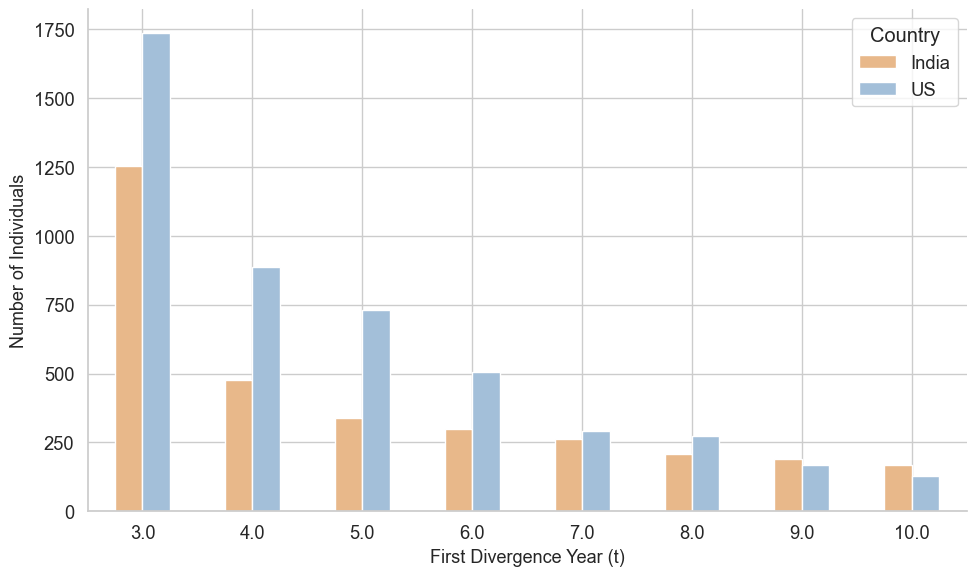

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 只保留 diverged 个体
diverged_df = df[df["diverged"] == 1].copy()

# 分国家计数
vc_divergence = diverged_df.groupby("country")["first_divergence_year"].value_counts().unstack().fillna(0).T

# 重命名列为想要的图例标签
vc_divergence = vc_divergence.rename(columns={"india": "India", "us": "US"})

# 设置画布
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 6))

india_color = "#E8B88A"
us_color = "#A3BFD9"

# 绘图（堆叠或并排任选），莫奈柔色调
vc_divergence.plot(
    kind="bar",
    ax=ax,
    color=[india_color, us_color]  # Monet-style: India / US
    # color=["#A6C1A9", "#C6A5CF"], # 薰衣草搭配颜色
)

# 设置标题与标签
# ax.set_title("Divergence Year Distribution by Country", fontsize=16)
ax.set_xlabel("First Divergence Year (t)", fontsize=13)
ax.set_ylabel("Number of Individuals", fontsize=13)
plt.xticks(rotation=0)
plt.legend(title="Country")
sns.despine()
plt.tight_layout()
plt.savefig("First Divergence Year Distribution by Country", 
            dpi=300, 
            bbox_inches='tight')
plt.show()

Prefix Rarity Score 分布 KDE 对比

先对 prefix rarity score 做 z-score 标准化，然后在图中画出 z = 1.5 对应的位置（即：标准化后的值为 1.5 的位置，在原始数据中的对应值）。

步骤逻辑：
1. 计算每组 prefix rarity score 的整体均值与标准差；
2. 使用这些参数把整个数据 z-score 标准化；
3. 计算 z = 1.5 对应的原始值；
4. 在原图中加一条竖线显示这个阈值位置。

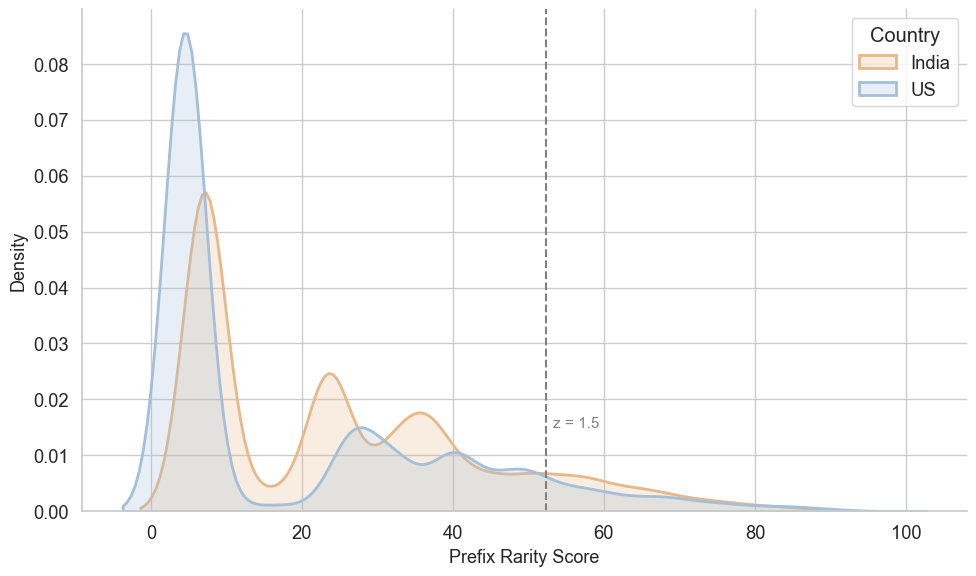

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 颜色
india_color = "#E8B88A"
us_color = "#A3BFD9"

# 计算全体的 mean 和 std（也可以分别对 India/US 做）
mean = pd.concat([india_df, us_df])["prefix_rarity_score"].mean()
std = pd.concat([india_df, us_df])["prefix_rarity_score"].std()

# 计算 z = 1.5 对应的原始值位置
z_thresh = 1.5
x_thresh = mean + z_thresh * std

# 画图
plt.figure(figsize=(10, 6))
sns.kdeplot(india_df["prefix_rarity_score"], label="India", fill=True, color=india_color, linewidth=2)
sns.kdeplot(us_df["prefix_rarity_score"], label="US", fill=True, color=us_color, linewidth=2)

# 加虚线
plt.axvline(x_thresh, color="grey", linestyle="--", linewidth=1.5)
plt.text(x_thresh + 1, 0.015, "z = 1.5", color="grey", fontsize=11)  # 从0.005提高到0.015

# 标签
plt.xlabel("Prefix Rarity Score", fontsize=13)
plt.ylabel("Density", fontsize=13)
plt.legend(title="Country")
sns.despine()
plt.tight_layout()

# 保存图像
plt.savefig("Prefix Rarity Score Distribution with Z-Threshold.png", dpi=300, bbox_inches='tight')
plt.show()


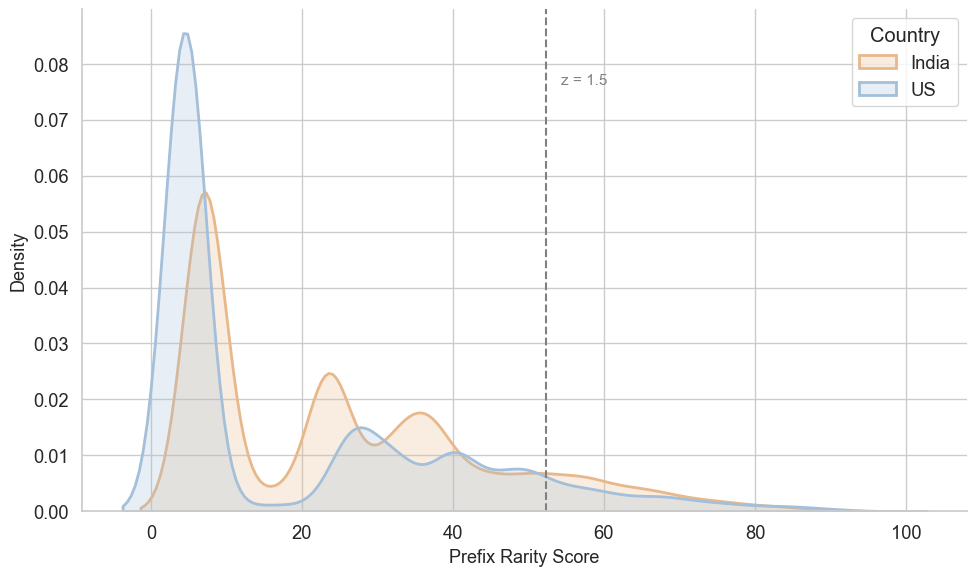

✅ 使用动态位置和背景框的改进版本


In [14]:
# 方法2：动态计算最佳文本位置 + 添加背景框（推荐）
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 颜色
india_color = "#E8B88A"
us_color = "#A3BFD9"

# 计算全体的 mean 和 std
mean = pd.concat([india_df, us_df])["prefix_rarity_score"].mean()
std = pd.concat([india_df, us_df])["prefix_rarity_score"].std()

# 计算 z = 1.5 对应的原始值位置
z_thresh = 1.5
x_thresh = mean + z_thresh * std

# 画图
plt.figure(figsize=(10, 6))
sns.kdeplot(india_df["prefix_rarity_score"], label="India", fill=True, color=india_color, linewidth=2)
sns.kdeplot(us_df["prefix_rarity_score"], label="US", fill=True, color=us_color, linewidth=2)

# 加虚线
plt.axvline(x_thresh, color="grey", linestyle="--", linewidth=1.5)

# 动态计算文本位置 - 获取当前图表的最大y值
ax = plt.gca()
y_max = ax.get_ylim()[1]
text_y = y_max * 0.85  # 设置在图表高度的85%位置

# 添加文本标签（往右偏移，无背景框）
plt.text(x_thresh + 2, text_y, "z = 1.5", color="grey", fontsize=11)

# 标签
plt.xlabel("Prefix Rarity Score", fontsize=13)
plt.ylabel("Density", fontsize=13)
plt.legend(title="Country")
sns.despine()
plt.tight_layout()

# 保存图像
plt.savefig("Prefix Rarity Score Distribution with Dynamic Z-Threshold.png", dpi=300, bbox_inches='tight')
plt.show()

print("✅ 使用动态位置和背景框的改进版本")


## 📝 文本标签位置调整方法总结

### 方法1：手动调整 y 坐标
- **优点**：简单直接，快速修复
- **缺点**：需要手动试验合适的数值
- **代码**：`plt.text(x_thresh + 1, 0.015, "z = 1.5", ...)`

### 方法2：动态计算位置 + 背景框（推荐）
- **优点**：自动适应不同数据范围，视觉效果更好
- **缺点**：代码稍复杂
- **特性**：
  - `y_max * 0.85`：自动计算在图表85%高度处
  - `bbox`：添加白色背景框，确保文字清晰可见
  - `alpha=0.8`：半透明效果，不完全遮挡背景

### 其他可选参数：
- **位置比例**：`y_max * 0.9`（更高）或 `y_max * 0.7`（更低）
- **文字对齐**：`ha='center'`（水平居中），`va='bottom'`（垂直底部对齐）
- **背景样式**：`boxstyle="round,pad=0.3"`（圆角）或 `"square,pad=0.2"`（方角）


In [ ]:
# 🎉 使用新的通用可视化函数！
# 演示 plot_prefix_rarity_distribution 的各种用法

# 首先重新导入以获取新函数
from sequenzo import plot_prefix_rarity_distribution

# 示例1：多组对比，带阈值线（你现在正在使用的效果）
data_dict = {
    "India": india_df["prefix_rarity_score"].tolist(),
    "US": us_df["prefix_rarity_score"].tolist()
}

stats = plot_prefix_rarity_distribution(
    data=data_dict,
    colors={"India": "#E8B88A", "US": "#A3BFD9"},
    show_threshold=True,
    z_threshold=1.5,
    save_as="rarity_distribution_with_threshold"
)

print("📊 统计信息:", stats)


In [ ]:
# 示例2：无阈值线，简洁对比
print("示例2：不显示阈值线")
plot_prefix_rarity_distribution(
    data=data_dict,
    colors={"India": "#E8B88A", "US": "#A3BFD9"},
    show_threshold=False,  # 关闭阈值线
    save_as="rarity_distribution_clean"
)

# 示例3：单组分析
print("\n示例3：单组分析（仅印度）")
plot_prefix_rarity_distribution(
    data=india_df["prefix_rarity_score"].tolist(),
    group_names=["India"],
    colors=["#E8B88A"],
    show_threshold=True,
    z_threshold=2.0,  # 不同的阈值
    threshold_label="高分歧阈值 (z=2.0)",  # 自定义标签
    save_as="india_only_analysis"
)

# 示例4：三组对比（如果有第三个国家的数据）
print("\n示例4：演示三组对比的可能性")
# 这里用模拟数据演示
import numpy as np
np.random.seed(42)
simulated_canada = np.random.normal(
    loc=np.mean(india_df["prefix_rarity_score"]) * 0.9, 
    scale=np.std(india_df["prefix_rarity_score"]) * 1.1, 
    size=len(india_df)
)

three_groups = {
    "India": india_df["prefix_rarity_score"].tolist(),
    "US": us_df["prefix_rarity_score"].tolist(),
    "Canada (simulated)": simulated_canada.tolist()
}

plot_prefix_rarity_distribution(
    data=three_groups,
    show_threshold=True,
    z_threshold=1.5,
    figsize=(12, 7),  # 稍大的图
    save_as="three_countries_comparison"
)

print("✅ 所有示例完成！")
